In [1]:
# Run this once at top of notebook (you may have these already)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("cars_sales_data.csv")   # change filename if needed
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]
df.head(15)


,manufacturer,model,engine_size,fuel_type,year_of_manufacture,mileage,price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
5,Ford,Focus,1.4,Petrol,2018,33603,29204
6,Ford,Mondeo,1.8,Diesel,2010,86686,14350
7,Toyota,Prius,1.4,Hybrid,2015,30663,30297
8,VW,Polo,1.2,Petrol,2012,73470,9977
9,Ford,Focus,2.0,Diesel,1992,262514,1049


In [9]:
# Dataset shape
print("Rows and Columns:", df.shape)

# Column info & missing values
print(df.info())

# Count missing values per column
print(df.isna().sum())

# Summary statistics for numeric columns
print(df.describe())

Rows and Columns: (50000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   manufacturer         50000 non-null  object 
 1   model                50000 non-null  object 
 2   engine_size          50000 non-null  float64
 3   fuel_type            50000 non-null  object 
 4   year_of_manufacture  50000 non-null  int64  
 5   mileage              50000 non-null  int64  
 6   price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
None
manufacturer           0
model                  0
engine_size            0
fuel_type              0
year_of_manufacture    0
mileage                0
price                  0
dtype: int64
        engine_size  year_of_manufacture        mileage          price
count  50000.000000         50000.000000   50000.000000   50000.000000
mean       1.773

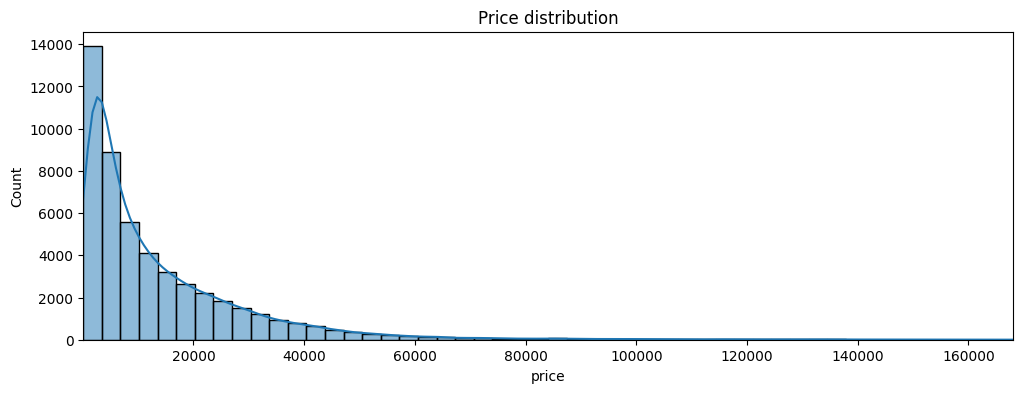

In [8]:
plt.figure(figsize=(12,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price distribution")
plt.xlim(df['price'].min(), df['price'].max())  # auto-adjust to your data
plt.show()


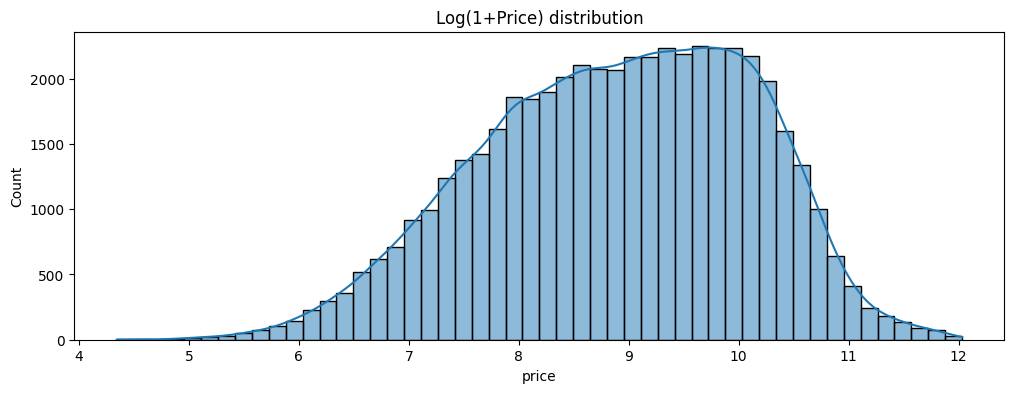

In [6]:
plt.figure(figsize=(12,4))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Log(1+Price) distribution")
plt.show()

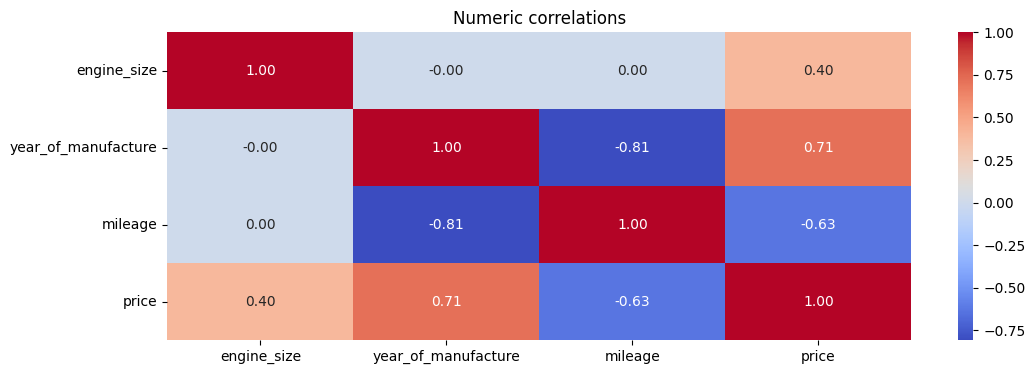

In [7]:
# Numeric correlation heatmap
num_cols = ['engine_size','year_of_manufacture','mileage','price']
plt.figure(figsize=(12,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numeric correlations")
plt.show()